In [2]:
import requests
import pandas as pd

In [3]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [4]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-06-11 14:10:50.746202')

In [6]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)
eth = get_historic_price('eth', 'bitstamp', after=last_week)

<AxesSubplot:xlabel='CloseTime'>

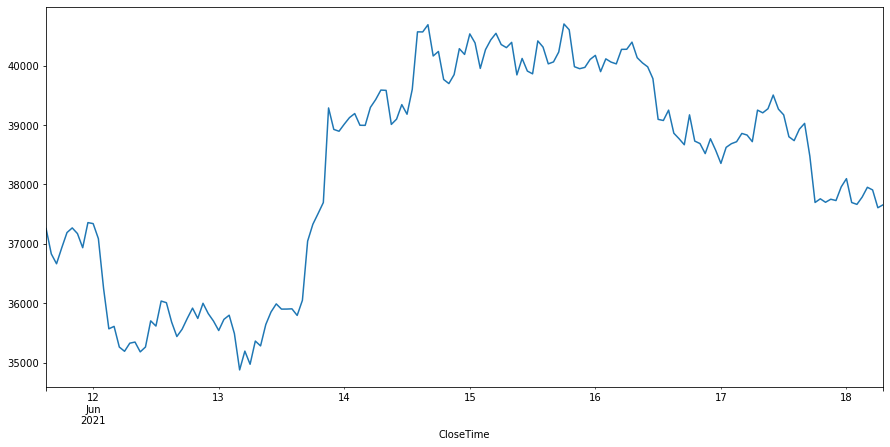

In [8]:
btc['ClosePrice'].plot(figsize=(15, 7))

<AxesSubplot:xlabel='CloseTime'>

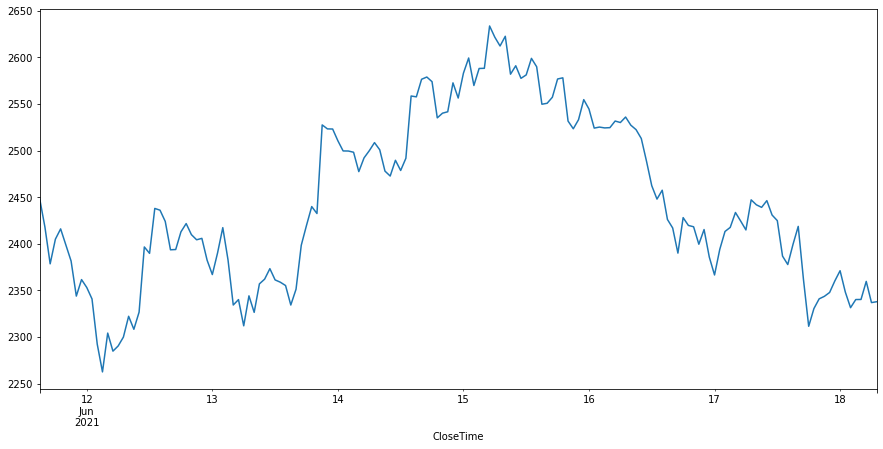

In [9]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [11]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [13]:
output_notebook()

Loading BokehJS ...

In [15]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [17]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend_label='Ether')

p1.legend.location = "top_left"

show(p1)

In [21]:
writer = pd.ExcelWriter('cryptos.xlsx')
btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Ether')
writer.save()